In [274]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [275]:
train = pd.read_csv("/kaggle/input/ai-201-b-mse-1-ai-a/train.csv")
test = pd.read_csv("/kaggle/input/ai-201-b-mse-1-ai-a/test.csv")

In [276]:
train.head()

,Input_Voltage_Deviation,Current_Flow_Variance,Thermal_Load_Index,Power_Factor_Offset,Energy_Output_Difference
0,0.735,0.342,0.567,2.837,848.85
1,-2.167,0.762,0.043,-2.262,-43.25
2,-0.277,0.923,-0.831,0.847,93.85
3,0.842,-0.941,0.589,0.198,98.95
4,-1.503,0.872,0.166,-0.541,-67.55


In [277]:
X = train.drop('Energy_Output_Difference', axis=1)
y = train['Energy_Output_Difference']

In [278]:
# train.isnull().sum()

In [279]:
# train.fillna('X').sum

X=X.fillna(X.mean())
y=y.fillna(y.mean())

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [281]:
# X_train.shape()

In [282]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [283]:
y_pred = model.predict(X_test)
print("Validation R2 Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

Validation R2 Score: 0.8424373915046607
Mean Squared Error: 5155.5410800114905


In [284]:
model.fit(X, y)

LinearRegression()

In [285]:
test_features = test.drop('id',axis=1)
test_preds = model.predict(test_features)

In [286]:
submission = pd.DataFrame({
    'id': test['id'],
    'Energy_Output_Difference': test_preds
})

In [287]:
submission.to_csv("submit2.csv", index=False)
print("\nFinal submission file created: sumit.csv")
print(submission.head())


Final submission file created: sumit.csv
   id  Energy_Output_Difference
0   1                 29.439198
1   2                147.886014
2   3                 63.625385
3   4                 59.033047
4   5               -103.920491


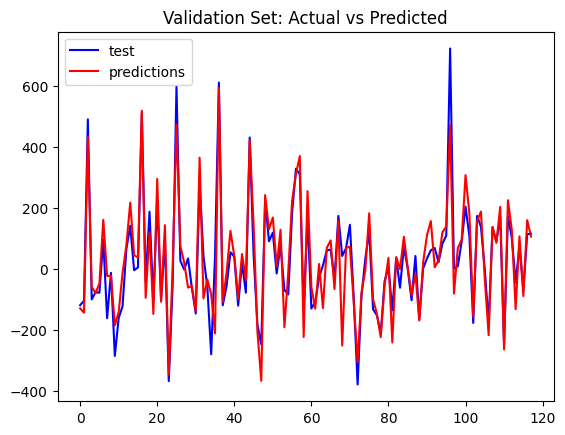

In [288]:
print("\n")
plt.plot(y_test.values, color = 'blue', label = 'test')
plt.plot(y_pred, color = 'red', label = 'predictions')
plt.title("Validation Set: Actual vs Predicted")
plt.legend()
plt.show()